In [83]:
import numpy as np
import sklearn.datasets as ds
import sklearn.cross_validation as c_v
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [96]:
bost = ds.load_boston()
bost.data.shape
X_train = bost.data[:379,:]
X_test =bost.data[379:,:]
y_train = bost.target[:379]
y_test =  bost.target[379:]



In [97]:
import sklearn.tree as tr
n=50
# generating first tree
tree = tr.DecisionTreeRegressor(max_depth=5,random_state=42)
tree.fit(X_train,y_train)

def gbm(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(trees, coefs)]) for x in X]

#creating arrays
trees = [tree]
coefs = [0.9]

for i in np.arange(0,n):
    tree = tr.DecisionTreeRegressor(max_depth=5,random_state=42)
    tree.fit(X_train,(y_train-gbm(X_train)))
    trees = np.append(trees,tree)
    coefs = np.append(coefs,[0.9])
coefs

array([ 0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9])

In [98]:
import sklearn.metrics as metrics

def wr1(ans):
    with open("Grad_Boost1.txt", "w") as fout:
        fout.write(str(ans))
def wr2(ans):
    with open("Grad_Boost2.txt", "w") as fout:
        fout.write(str(ans))
def wr3(ans):
    with open("Grad_Boost3.txt", "w") as fout:
        fout.write(str(ans))
def wr4(ans):
    with open("Grad_Boost4.txt", "w") as fout:
        fout.write(str(ans))

In [99]:
error= metrics.mean_squared_error(y_test,gbm(X_test))

In [100]:
wr1(np.sqrt(error))
print error

29.9959123478


In [101]:
tree1 = tr.DecisionTreeRegressor(max_depth=5,random_state=42)
tree1.fit(X_train,y_train)
trees1 = [tree1]
coefs1 = [0.9]

def gbm1(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(trees1, coefs1)]) for x in X]
trees = [tree]

for i in np.arange(1,n):
    tree = tr.DecisionTreeRegressor(max_depth=5,random_state=42)
    tree.fit(X_train,(y_train-gbm1(X_train)))
    trees1 = np.append(trees1,tree)
    coefs1 = np.append(coefs1,0.9/(1+i))
    
    
print coefs1
err1 = metrics.mean_squared_error(y_test,gbm1(X_test))
print np.sqrt(err1)
wr2(np.sqrt(err1))

[ 0.9         0.45        0.3         0.225       0.18        0.15
  0.12857143  0.1125      0.1         0.09        0.08181818  0.075
  0.06923077  0.06428571  0.06        0.05625     0.05294118  0.05
  0.04736842  0.045       0.04285714  0.04090909  0.03913043  0.0375      0.036
  0.03461538  0.03333333  0.03214286  0.03103448  0.03        0.02903226
  0.028125    0.02727273  0.02647059  0.02571429  0.025       0.02432432
  0.02368421  0.02307692  0.0225      0.02195122  0.02142857  0.02093023
  0.02045455  0.02        0.01956522  0.01914894  0.01875     0.01836735
  0.018     ]
4.81089328026


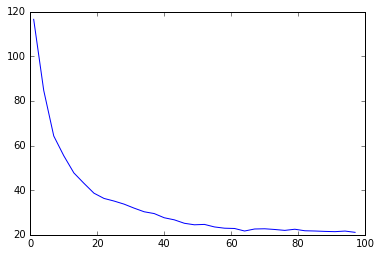

In [102]:
xs = np.arange(1,100,3)
ys = np.zeros(xs.shape)
s=0
for i in xs:
    bst = e.GradientBoostingRegressor(n_estimators=i)
    bst.fit(X_train,y_train)
    ys[s] = metrics.mean_squared_error(y_test,bst.predict(X_test))
    s=s+1
plt.plot(xs,ys)    

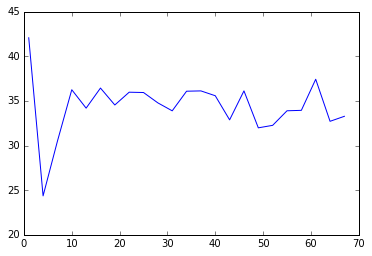

In [103]:
xd = np.arange(1,70,3)
yd = np.zeros(xd.shape)
s=0
for i in xd:
    bst = e.GradientBoostingRegressor(max_depth=i,n_estimators=50)
    bst.fit(X_train,y_train)
    yd[s] = metrics.mean_squared_error(y_test,bst.predict(X_test))
    s=s+1
plt.plot(xd,yd)

In [104]:
wr3(1)

In [105]:
import sklearn.linear_model as lm

In [106]:
regr = lm.LinearRegression()
regr.fit(X_train,y_train)
erlin = metrics.mean_squared_error(y_test,regr.predict(X_test))
print erlin
wr4(np.sqrt(erlin))

68.4006415169


In [107]:
c_v.cross_val_score(bst,X_train,y_train,cv=4)

array([ 0.58053573,  0.62865424,  0.47946722,  0.17607003])

In [61]:
print y_train,bst.predict(X_train)

[ 20.2  11.9  17.4  16.7  18.2   8.7  18.7  35.2  20.   18.5  18.   25.1
  22.2  17.   20.4  10.2  21.4   5.   32.7  10.9  31.5   7.   21.2  23.7
  50.   20.3  43.5  50.   22.   19.6  50.   23.1  33.8  22.4  26.2  11.8
  22.5  33.3  23.8  18.6  22.   14.9  18.4  24.7  22.2  32.   33.4  15.
  19.7  50.   29.1  19.6  19.1  19.6   8.3  32.9  24.6  34.9  42.8   6.3
  16.8  28.2  16.4  19.5  16.2  29.9  17.7  17.1  22.   21.7  20.1  20.9
  17.2  22.7  14.5  25.   22.2  24.3  30.8  13.2   8.8  28.7  20.5  19.1
  12.7  23.2  10.8  26.5  24.   44.8  23.1  17.1  18.8  18.2  14.8  13.8
  19.5  20.1  15.3  16.2  29.6  14.1  15.   23.7  19.2  24.3  22.5  36.4
  27.1  13.8  24.5  12.5  20.8  13.9  22.5  29.6  34.7  13.4  27.9  23.9
  21.4  15.6  28.1  25.   24.1  26.6  23.9  22.   11.7  20.6  26.6  12.3
  33.1   5.6  13.3  20.9  17.9  22.9  43.1  50.   21.4  48.5  17.4  10.5
  23.2   7.   14.4  27.5  21.    8.5  24.   20.6  17.8  19.8  14.9  13.4
  25.2  20.7  28.6   9.5  33.2  20.7  29.1   5.   31